In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats, optimize, integrate

from mpmath import *

from code.python.mpmath_integration import quad_phi

In [3]:
alpha = 10.005
beta = 0.0025
mu = 0.25
delta = 0.1
x = -0.5

x = -20
alpha = 50
beta = 12
mu = 1
delta = 45

x = -0.4519899000274793
alpha = 0.54845308531407
beta = 0.3
mu = 0.3756820526459652
delta = 0.4430694917478499

gamma = np.sqrt(alpha**2 - beta**2)

x -mu, gamma, gamma * delta

(-0.8276719526734445, 0.4591304681574972, 0.20342670317249464)

In [4]:
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=inf, digits=300)

mpf('0.061844292709307212')

In [5]:
eps = 2 ** (-53)

In [6]:
def truncation(alpha, beta, mu, delta, eps):
    gamma = np.sqrt(alpha**2 - beta**2)
    gamma2 = gamma ** 2
    
    C = delta * np.exp(delta * gamma) / np.sqrt(2 * np.pi)
        
    # Exact
    u = (gamma2 * eps / (2 * C)) ** (2/3)
    y = gamma2 / 3 / u
    N = 3 / gamma2 * lambertw(y)
    N = int(np.ceil(float(N)))

    # Upper bound
    Napprox = 3 / gamma2 * np.log(y) ** (np.log(y) / (1 + np.log(y)))
    Napprox = int(np.ceil(float(Napprox)))
    
    # Compute upper bound
    bound = 2 * np.exp(-delta ** 2 / (2*N) - gamma2 / 2 * N) / N ** (3/2) / gamma2 * C

    return N, Napprox, bound

In [7]:
N, Napprox, bound = truncation(alpha, beta, mu, delta, eps)
N, Napprox, bound

(276, 278, 1.0411692938565544e-16)

In [8]:
quad_phi(x, alpha, beta, mu, delta, a=N, b=inf, digits=100)

mpf('1.6770136860753306e-23')

In [9]:
eps *= 1

gamma = np.sqrt(alpha**2 - beta**2)
gamma2 = gamma ** 2
dg = delta * gamma

C = delta * np.exp(dg) / np.sqrt(2 * np.pi)
u = (gamma2 * eps / (2 * C)) ** (2/3)
y = gamma2 / 3 / u
logy = np.log(y)


Napprox = 3 / gamma2 * logy ** (logy / (1 + logy))
logy, Napprox

(22.316045311501284, 277.98766473239573)

In [49]:
3 / gamma2 * lambertw(y)

mpf('275.42385071194923')

In [31]:
gamma * delta * np.exp(dg)  > 3 **(3/2) * np.sqrt(np.pi / 2) * eps

True

In [35]:
gamma * delta * np.exp(dg), np.sqrt(np.pi * 27 / 2)

(0.249318815798435, 6.512411291024408)

In [12]:
y, gamma ** 2 * (2 * C) ** (2/3) / 3 / gamma ** (4/3) / eps ** (4/3)

(4917397733.162306, mpf('2.128768899999919e+20'))

In [10]:
logC = np.log(delta) + dg - 1/2 * np.log(2 * np.pi)
logy = np.log(gamma2) - np.log(3) - 2/3 * (np.log(gamma2) + np.log(eps) - np.log(2) - logC)

_logy = 1/3 * np.log(gamma2) - 2/3 * (np.log(eps) - logC) -0.636514168294813

Napprox = 3 / gamma2 * logy ** (logy / (1 + logy))
Napprox = int(np.ceil(float(Napprox)))

# Compute upper bound
N = Napprox
C = delta * exp(delta * gamma) / np.sqrt(2 * np.pi)
bound = 2 * exp(-delta ** 2 / (2*N) - gamma2 / 2 * N) / N ** (3/2) / gamma2 * C

logy, _logy, Napprox, bound

(22.316045311501288, 22.316045311501284, 278, mpf('8.3419824783823826e-17'))

In [189]:
quad_phi(x, alpha, beta, mu, delta, a=N, b=inf, digits=200)

mpf('1.48741650182152743866861728073357111382268513070386550665271960415132831578242519275766316558800586797518120893184100270750134272866260188642163955187669283710694917149390495920261565396186300328218678336073127647697980721741954107241260271059824910023230046547494486151875234548201785560574636802448659e-169')

In [167]:
np.log(gamma2), 2* np.log(gamma)

(7.823946005855959, 7.823946005855959)

In [147]:
- 1/2 * np.log(2 * np.pi)

-0.9189385332046727

In [149]:
-np.log(3) + 2/3 * np.log(2)

-0.636514168294813

In [155]:
1/3

0.3333333333333333

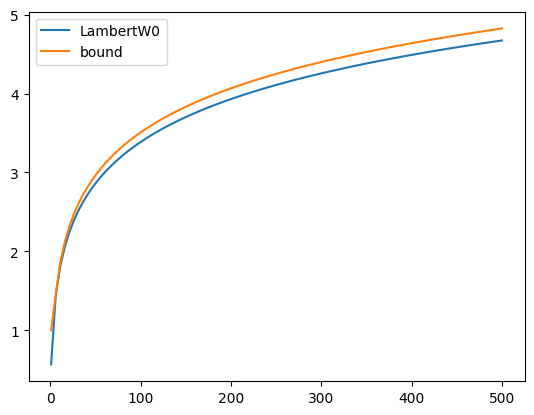

In [60]:
x = np.linspace(1, 500, 100)

ref = special.lambertw(x, k=0).real
logx = np.log(x)
bound = logx ** (logx / (1 + logx))

plt.plot(x, ref, label='LambertW0')
plt.plot(x, bound, label='bound')

plt.legend()
plt.show()